In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data=pd.read_csv("HousePricePrediction.csv")

In [3]:
data.head

<bound method NDFrame.head of         Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0        0          60       RL     8450    Inside     1Fam            5   
1        1          20       RL     9600       FR2     1Fam            8   
2        2          60       RL    11250    Inside     1Fam            5   
3        3          70       RL     9550    Corner     1Fam            5   
4        4          60       RL    14260       FR2     1Fam            5   
...    ...         ...      ...      ...       ...      ...          ...   
2914  2914         160       RM     1936    Inside    Twnhs            7   
2915  2915         160       RM     1894    Inside   TwnhsE            5   
2916  2916          20       RL    20000    Inside     1Fam            7   
2917  2917          85       RL    10441    Inside     1Fam            5   
2918  2918          60       RL     9627    Inside     1Fam            5   

      YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  To

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


In [5]:
X=data['YearBuilt'].values.reshape(-1,1)
X

array([[2003],
       [1976],
       [2001],
       ...,
       [1960],
       [1992],
       [1993]], dtype=int64)

In [6]:
y=data['SalePrice']
y

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
2914         NaN
2915         NaN
2916         NaN
2917         NaN
2918         NaN
Name: SalePrice, Length: 2919, dtype: float64

In [7]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
X=imputer.fit_transform(X)
X

array([[2003],
       [1976],
       [2001],
       ...,
       [1960],
       [1992],
       [1993]], dtype=int64)

In [8]:
imputer_y=SimpleImputer(missing_values=np.nan,strategy="mean")
y=imputer_y.fit_transform(y.values.reshape(-1,1))
y

array([[208500.        ],
       [181500.        ],
       [223500.        ],
       ...,
       [180921.19589041],
       [180921.19589041],
       [180921.19589041]])

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [10]:
from sklearn.linear_model import LinearRegression
regeressor=LinearRegression()
regeressor.fit(X_train,y_train)

LinearRegression()

In [11]:
predict=regeressor.predict(X_test)

In [12]:
predict

array([[184452.57497535],
       [165867.39982892],
       [204414.42976225],
       [179634.19623368],
       [203037.75012178],
       [148658.90432296],
       [204414.42976225],
       [168620.75910987],
       [184452.57497535],
       [204414.42976225],
       [168620.75910987],
       [164490.72018844],
       [203726.08994201],
       [205791.10940273],
       [202349.41030154],
       [206479.44922297],
       [180322.53605392],
       [171374.11839082],
       [171374.11839082],
       [149347.2441432 ],
       [167244.07946939],
       [203726.08994201],
       [198907.71120035],
       [178945.85641344],
       [175504.15731225],
       [178945.85641344],
       [193400.99263844],
       [205102.76958249],
       [152788.94324439],
       [145217.20522177],
       [192024.31299797],
       [148658.90432296],
       [203726.08994201],
       [205791.10940273],
       [203726.08994201],
       [203037.75012178],
       [156918.98216582],
       [176192.49713249],
       [1514

Text(0, 0.5, 'price')

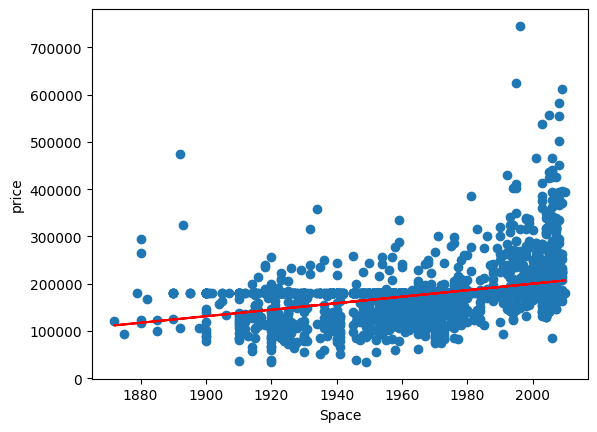

In [13]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regeressor.predict(X_train),color='red')
plt.xlabel('Space')
plt.ylabel('price')

Text(0, 0.5, 'price')

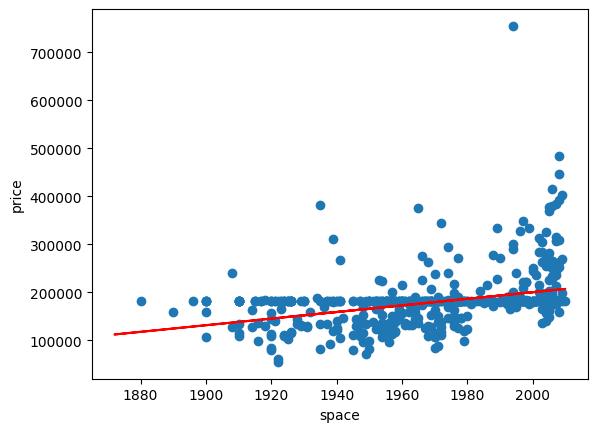

In [14]:
plt.scatter(X_test,y_test)
plt.plot(X_train,regeressor.predict(X_train),color='red')
plt.xlabel('space')
plt.ylabel('price')